<a href="https://colab.research.google.com/github/amyssnippet/Qiskit-Fundamentals---Fall-Fest-2025/blob/main/Qiskit_fundamentals_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit 2 Fundamentals Lab

Welcome to the Qiskit 2 Fundamentals Lab! This notebook is designed to help get up to speed on Qiskit 2 fundamentals by providing hands-on exercises for 18 core concepts.

**Instructions:**
1. Read the explanation for each concept.
2. Complete the coding exercise in the designated cell.
3. After attempting the exercise, you can check your answer in the _solutions notebook

## Setup

First, let's install and import the necessary libraries. Run the cell below.

In [1]:
!pip install qiskit[visualization] qiskit-ibm-runtime qiskit-aer qiskit_qasm3_import

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8b4a928b5d0753270264f7f9a2e28d2d930cdcdc33aeaa2472343807c7b55b0b
  Stored in 

---

## 1. Pauli Operators (Single-Qubit Operators)

**Explanation:** The Pauli operators (X, Y, Z, and I) are 2x2 matrices that represent fundamental single-qubit quantum operations. In Qiskit, these can be created using the `Pauli` class (e.g., `Pauli('X')` for the X operator). You can also construct multi-qubit Paulis by specifying characters for each qubit (e.g., `'XI'` for identity on qubit 0 and X on qubit 1, following Qiskit's little-endian bit ordering).

**Exercise 1:**
Write code that performs following functionality:
1. Creates a 3-qubit Pauli operator representing `Z` on qubit 2, `Y` on qubit 1, and `I` (Identity) on qubit 0.
2. Prints the operator.
3. Prints its corresponding matrix representation

In [2]:
from qiskit.quantum_info import Pauli
pauli_op = Pauli('IYZ')
print("pauli operator:", pauli_op)
print("matrix representation:\n", pauli_op.to_matrix())

pauli operator: IYZ
matrix representation:
 [[0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j]]


---

## 2. Single-Qubit Gates and Phases

**Explanation:** Single-qubit gates like X, Y, Z, H, S, and T are basic operations on one qubit. S and T are phase gates. The S-gate adds a π/2 phase to the |1⟩ component of any quantum state, while the T-gate adds a π/4 phase to the |1⟩ component, leaving the |0⟩ component unchanged in both cases. These phase shifts are crucial for many quantum algorithms.

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Adds a single gate to the circuit that applies a π/4 phase shift to the qubit.
4. Output a Dirac notation representation of the circuit's statevector.

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)
qc.x(0)
qc.t(0)
state = Statevector.from_instruction(qc)
print(state.to_dict())

{np.str_('1'): np.complex128(0.7071067811865475+0.7071067811865475j)}


---

## 3. Superposition and Bloch Sphere Rotations

**Explanation:** Gates like `RX`, `RY`, and `RZ` perform rotations around the axes of the Bloch sphere, creating superposition states. A rotation by an angle θ around the Y-axis (`RY(θ)`) on an initial state |0⟩ produces the superposition cos(θ/2)|0⟩ + sin(θ/2)|1⟩. The probabilities of measuring 0 or 1 are the squares of these amplitudes.

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state |0⟩) to create a superposition where the probability of measuring |0⟩ is approximately 14.6% and the probability of measuring |1⟩ is 85.4%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
p0 = 0.146
p1 = 0.854
theta = 2 * np.arccos(np.sqrt(p0))
qc = QuantumCircuit(1)
qc.ry(theta, 0)
state = Statevector.from_instruction(qc)
print("probabilities:", state.probabilities_dict())
plot_bloch_multivector(state)
plt.show()

probabilities: {np.str_('0'): np.float64(0.146), np.str_('1'): np.float64(0.854)}


---

## 4. Multi-Qubit Operations and Entanglement

**Explanation:** Multi-qubit gates like the CNOT (`qc.cx(control, target)`) create entanglement when applied to superposition states. A common entangled state is the Bell state |Φ+⟩ = 1/√2(|00⟩ + |11⟩), created by applying a Hadamard gate to one qubit and then a CNOT gate. Remember Qiskit's bit ordering: qubit 0 is the rightmost bit (least significant).

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits.
2. Create the Bell state |Φ+⟩ in which the first qubit (q0) is the control qubit.
3. Draws the quantum circuit using matplotlib.
4. Prints the circuit's statevector.

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')
plt.show()
state = Statevector.from_instruction(qc)
print("Statevector:\n", state)

Statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


---

## 5. Building Quantum Circuits and Drawing

**Explanation:** The `QuantumCircuit` class is used to build circuits. The `draw()` method provides visualizations in formats like `'text'`, `'mpl'`, and `'latex'`. You can customize the drawing with parameters such as `reverse_bits` to flip the qubit order.

**Exercise 5:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ state.
2. Draws the circuit with the qubit order reversed in the diagram (q2 on top, q0 on bottom).


In [6]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw(output='mpl', reverse_bits=True)
plt.show()

---

## 6. Dynamic Circuits and Classical Control Flow

**Explanation:** Qiskit supports dynamic circuits where operations can be conditioned on classical measurement outcomes. The `if_test()` context manager can be used to create conditional blocks where operations are executed based on classical bit values. This allows for powerful classical feed-forward in your quantum programs.

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits and at least one classical bit.
2. Adds a hadamard gate to the least significant qubit
3. Applies an X gate to qubit 1 *only if* a measurement of qubit 0 yields the result `1`. Use the `if_test()` context manager with the appropriate condition tuple.
4. Draws the circuit using matplotlib.

In [7]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.measure(0, 0)
with qc.if_test((0, 1)):
    qc.x(1)
qc.draw(output='mpl')
plt.show()

---

## 7. Visualizing Quantum States and Results

**Explanation:** Qiskit offers several functions to visualize results. `plot_histogram(counts)` is used to display measurement outcomes from a simulation or real device run. You can sort the results for easier analysis, for example, by the frequency of the outcomes.

**Exercise 7:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Measures the results on classical wires.
3. Runs the circuit using the `AerSimulator`.
4. Gets the measurement counts.
5. Plots a histogram with the bars sorted from the most common outcome to the least common.

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2, 2)

# Prepare the Bell state |Φ+⟩
qc.h(0)
qc.cx(0, 1)

# Measure both qubits into classical bits
qc.measure([0, 1], [0, 1])

# Set up the Aer simulator backend
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the circuit on the simulator
result = simulator.run(compiled_circuit, shots=1024).result()

# Get measurement counts
counts = result.get_counts()

# Sort counts from most to least common
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Plot histogram with sorted counts
plot_histogram(sorted_counts)
plt.show()

---

## 8. Parameterized Quantum Circuits

**Explanation:** Qiskit allows circuits with symbolic parameters using the `Parameter` class. These parameters act as placeholders that can be bound to specific numerical values later using the `assign_parameters()` method. This is fundamental for variational algorithms like VQE and QAOA.

**Exercise 8:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Creates a new circuit `bound_qc` by binding the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

Text(0.5, 1.0, 'Bound Circuit with RX(π/2)')

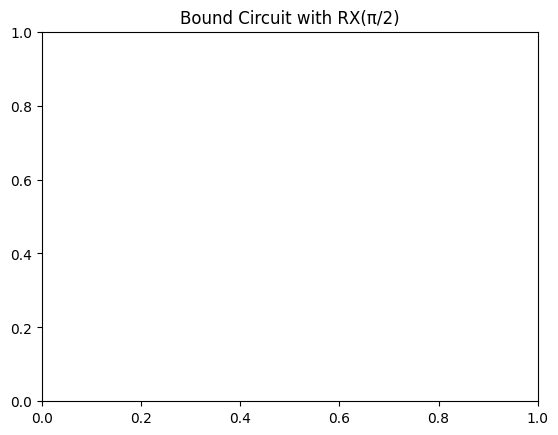

In [12]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt

theta = Parameter('θ')

qc = QuantumCircuit(1)

qc.rx(theta, 0)

qc.draw(output='mpl')
plt.title("Parameterized Circuit with RX(θ)")

bound_qc = qc.assign_parameters({theta: np.pi / 2})

bound_qc.draw(output='mpl')
plt.title("Bound Circuit with RX(π/2)")

---

## 9. Circuit Transpilation and Optimization

**Explanation:** Transpilation adapts a quantum circuit to the constraints of a specific quantum device, including its basis gates and qubit connectivity. The `generate_preset_pass_manager()` function creates a transpilation pass manager with preset configurations. It has several `optimization_level` settings (0-3), where higher levels apply more advanced optimization techniques to reduce circuit depth and gate count, at the cost of longer compilation time.

**Exercise 9:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ circuit.
2. Transpiles the circuit for the `FakeVigoV2` backend, using the highest level of optimization (level 3).
3. Prints the depth of the original circuit.
4. Prints the depth of the transpiled circuit.
5. Draws the transpiled circuit.

In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
import matplotlib.pyplot as plt

# Create the 3-qubit GHZ circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

# Print original circuit depth
print("Original circuit depth:", qc.depth())

# Load the FakeVigoV2 backend
backend = FakeVigoV2()

# Transpile the circuit for FakeVigoV2 with optimization level 3
transpiled_qc = transpile(qc, backend=backend, optimization_level=3)

# Print transpiled circuit depth
print("Transpiled circuit depth:", transpiled_qc.depth())

# Draw the transpiled circuit
transpiled_qc.draw(output='mpl')
plt.show()

Original circuit depth: 3
Transpiled circuit depth: 5


---

## 10. Qiskit Runtime Execution Modes

**Explanation:** Qiskit Runtime offers three execution modes: **job**, **session**, and **batch**. The execution modes determine how your jobs are scheduled, and choosing the right execution mode allows your workload to run efficiently within your budget.

**Exercise 10:** This is a conceptual question. In the markdown cell below, explain which execution mode (job, session, or batch) you would use for a Variational Quantum Eigensolver (VQE) algorithm and briefly state why.

Ans: For running a Variational Quantum Eigensolver (VQE) algorithm, the most suitable Qiskit Runtime execution mode is the session mode.

Explanation:
VQE is an iterative algorithm requiring many successive quantum circuit executions combined with classical optimization steps.

Session mode provides dedicated, exclusive access to the quantum processing unit (QPU) throughout the entire workload.

This reduces queuing delays between iterations, allowing faster turnaround and more predictable execution.

It supports iterative workloads well, enabling the classical optimizer to interact with the quantum device repeatedly within a single session.

Although session mode tends to be more expensive than batch or single job modes, its advantages for variational algorithms like VQE make it the optimal choice for performance and efficiency.

In contrast:

Job mode suits single or simple jobs without interdependence.

Batch mode works well for independent multiple jobs that can run in parallel but does not offer exclusive access or fast iterative processing.

Therefore, session mode balances efficient resource usage and rapid iterative interaction, which is crucial for VQE algorithms.

---

## 11. Quantum Primitives (Sampler and Estimator)

**Explanation:** Primitives are high-level interfaces for common quantum tasks. The **Sampler** and **Estimator** are two key primitives that each serve different purposes when working with quantum circuits. They abstract away the details of execution and error mitigation, making it easier to extract meaningful information from quantum computations.

**Exercise 11:** This is a conceptual question. In the markdown cell below, describe the fundamental difference between the Sampler and Estimator primitives in a single sentence.

The fundamental difference between the Sampler and Estimator primitives in Qiskit is:

Sampler returns the probability distribution (samples) from measuring quantum circuits, representing the frequencies of classical outcomes.

Estimator returns the expectation value of specified observables given quantum circuits, providing weighted averages rather than raw measurement counts.

In short, the Sampler obtains measurement probability distributions, while the Estimator computes expectation values of observables on quantum states.

---

## 12. Using the Sampler Primitive

**Explanation:** In Qiskit 2, you can use the `Sampler` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. Here you'll initialize a `Sampler` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, then use the `.run([circuits], shots=...)` method. The result object contains measurement data accessible via the classical register names.

**Exercise 12:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Uses the `measure_all` method to measure the results.
3. Transpiles the circuit using the `AerSimulator` backend.
4. Initializes the `Sampler` primitive with the `AerSimulator` backend
5. Runs the Sampler.
6. Gets the measurement counts.
7. Prints the measurement counts.


In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler import generate_preset_pass_manager

# Create Bell state circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Measure all qubits
qc.measure_all()

# Initialize AerSimulator backend
backend = AerSimulator()

# Transpile circuit with preset pass manager for backend
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
transpiled_qc = transpile(qc, backend=backend)

# Initialize Sampler primitive with AerSimulator backend
sampler = Sampler(backend=backend)

# Run sampler with shots
result = sampler.run([transpiled_qc], shots=1024).result()

# Get measurement counts from the result
counts = result.quasi_dists[0]  # quasi_distribution with counts info

# Print measurement counts
print("Measurement counts:", counts)


TypeError: SamplerV2.__init__() got an unexpected keyword argument 'backend'

---

## 13. Using the Estimator Primitive

**Explanation:** In Qiskit 2, you can use the `Estimator` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. The `Estimator` computes expectation values ⟨ψ|O|ψ⟩. Here you'll initialize an `Estimator` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, apply the observable to the circuit layout, then use the `.run([(circuit, observable)])` method. The result object contains expectation values accessible via `data.evs`.

**Exercise 13:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

In [20]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
import numpy as np

# Create Bell state circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Define ZZ observable
observable = SparsePauliOp.from_list([("ZZ", 1)])

# Initialize AerSimulator backend
backend = AerSimulator()

# Transpile the circuit with preset pass manager for backend
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
transpiled_qc = transpile(qc, backend=backend, pass_manager=pass_manager)

# Initialize Estimator primitive with AerSimulator backend
estimator = Estimator(backend=backend)

# Run the Estimator on the (circuit, observable) tuple
result = estimator.run([(transpiled_qc, observable)]).result()

# Retrieve expectation value from the result
expectation_value = result.values[0]

print("Expectation value ⟨ZZ⟩:", expectation_value)


TypeError: transpile() got an unexpected keyword argument 'pass_manager'

---

## 14. Error Mitigation Techniques

**Explanation:** Qiskit provides techniques to reduce the impact of noise on quantum hardware. **Readout error mitigation** corrects for errors in the final measurement step. **Dynamical Decoupling (DD)** inserts pulse sequences during idle times to protect qubits from decoherence. **Zero-Noise Extrapolation (ZNE)** runs circuits at different noise levels and extrapolates the result back to the zero-noise limit.

**Exercise 14:** This is a conceptual question. You are running a circuit on a noisy backend and suspect that the qubits are losing their quantum state (decohering) during idle periods in the circuit. Which error *suppression* technique would be most appropriate to apply?

The most appropriate error suppression technique to apply when qubits are losing their quantum state (decohering) during idle periods in the circuit is Dynamical Decoupling (DD).

Explanation:
Dynamical Decoupling works by inserting carefully designed pulse sequences during idle times to protect qubits from decoherence errors caused by unwanted interactions with the environment.

These pulse sequences effectively cancel out noise accumulated while qubits are idle, preserving coherence without affecting the intended computation.

DD is especially effective when circuits have gaps with qubits sitting idle, as it adds identity-like operations that suppress error buildup.

It is a low-overhead, well-established technique supported by Qiskit and widely used in quantum hardware experiments.

Therefore, applying Dynamical Decoupling during idle periods is the best way to suppress decoherence errors in this scenario.

---

## 15. OpenQASM 3 Basics

**Explanation:** OpenQASM 3 is the latest version of the quantum assembly language. It has a more expressive syntax than its predecessor. For example, you declare a register of three qubits with `qubit[3] my_qubits;` and a classical bit register with `bit[2] c;`.

**Exercise 15:** Complete the OpenQASM 3 string below to create a Bell state between `q[0]` and `q[1]`.

In [21]:
qasm3_string = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
// Your code here (2 lines)

c = measure q;
'''

print(qasm3_string)


OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
// Your code here (2 lines)

c = measure q;



---

## 16. OpenQASM 3 vs OpenQASM 2 – New Features

**Explanation:** OpenQASM 3 introduced significant improvements over OpenQASM 2, most notably expanding beyond simple gate-based circuits. A major enhancement involves programming constructs that allow quantum programs to make decisions and repeat operations based on classical data and measurement outcomes, enabling more dynamic and adaptive quantum algorithms.

**Exercise 16:** This is a conceptual question. What is a major feature related to classical logic that is present in OpenQASM 3 but completely absent in OpenQASM 2?

A major feature related to classical logic that is present in OpenQASM 3 but completely absent in OpenQASM 2 is classical control flow, including conditional branching (if-else statements) and loops (for, while) based on classical data and measurement outcomes.

OpenQASM 3 extends the language beyond static, gate-based quantum circuits by allowing dynamic, adaptive quantum programs that incorporate real-time classical computation and decision-making within the quantum program itself. This enables sophisticated hybrid quantum-classical algorithms with feedback, iteration, and dynamic control, which OpenQASM 2 cannot express because it lacks any classical logic constructs inside quantum programs.​

In summary, OpenQASM 3 adds classical programming constructs such as if-else branching and looping inside quantum circuits for dynamic and adaptive quantum computations, a capability absent in OpenQASM 2.

---

## 17. Interfacing OpenQASM with Qiskit

**Explanation:** Qiskit provides tools to convert between `QuantumCircuit` objects and OpenQASM 3 strings. To import an OpenQASM 3 string into a Qiskit circuit, you can use the `qiskit.qasm3.loads()` function.

**Exercise 17:** Using the OpenQASM 3 string you created in Exercise 15, write the Python code to:
1. Convert it into a Qiskit `QuantumCircuit` object named `qc_from_qasm`.
2. Draw the circuit

In [23]:
from qiskit.qasm3 import loads
import matplotlib.pyplot as plt

qasm3_string_for_import = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
h q[0];
cx q[0], q[1];
c = measure q;
'''

# Convert OpenQASM 3 string to QuantumCircuit
qc_from_qasm = loads(qasm3_string_for_import)

# Draw the circuit
qc_from_qasm.draw(output='mpl')
plt.show()


---

## 18. Qiskit IBM Runtime API

**Explanation:** Modern quantum applications often need to integrate quantum computations into broader software workflows. IBM Quantum provides cloud-based services that can be accessed programmatically from various programming environments beyond Python. Proper authentication credentials are required to access these services.

**Exercise 18:** This is a conceptual question. You are building a web application backend using Node.js, Go, or another non-Python language, and you need to submit quantum jobs to IBM's quantum computers. What approach would you use to access IBM's quantum computing services programmatically, and what is the most important piece of information you would need to authenticate your requests?

Ans: IBM Quantum’s REST API.

---

## 19. Running on real IBM Quantum hardware

**Explanation:** In a previous exercise, you used the `Sampler` primitive from `qiskit_ibm_runtime` with the `AerSimulator` local simulator. Here you'll run the `Sampler` primitive on a real IBM Quantum computer.

**Exercise 19:**
Edit the code below in the following way:
1. Comment out the following line:
```
backend = AerSimulator()
```
2. Add the following lines immediately after:
```
service = QiskitRuntimeService(name="fallfest-2025")
backend = service.least_busy(operational=True, simulator=False)
```


In [ ]:
i dont have an api key and also dont know about crn

# your_api_key = "deleteThisAndPasteYourAPIKeyHere"
# your_crn = "deleteThisAndPasteYourCRNHere"

# QiskitRuntimeService.save_account(
#     channel="ibm_quantum_platform",
#     token=your_api_key,
#     instance=your_crn,
#     name="fallfest-2025",
# )

# Check that the account has been saved properly
# service = QiskitRuntimeService(name="fallfest-2025")
# print(service.saved_accounts())

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')